In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:

plt.style.use('ggplot')

In [2]:
call1519 = pd.read_csv('call1519.csv')
crime1519 = pd.read_csv('crime1519.csv')

In [3]:
call1519.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085932 entries, 0 to 2085931
Data columns (total 12 columns):
Original Time Queued           object
CAD Event Number               int64
Event Clearance Description    object
Call Type                      object
Priority                       int64
Initial Call Type              object
Final Call Type                object
Original Time Queued.1         object
Arrived Time                   object
Precinct                       object
Sector                         object
Beat                           object
dtypes: int64(2), object(10)
memory usage: 191.0+ MB


In [4]:
crime1519.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356553 entries, 0 to 356552
Data columns (total 18 columns):
Offense Start DateTime      356553 non-null object
Report Number               356553 non-null object
Offense ID                  356553 non-null int64
Offense Start DateTime.1    356553 non-null object
Offense End DateTime        176464 non-null object
Report DateTime             356553 non-null object
Group A B                   356553 non-null object
Crime Against Category      356553 non-null object
Offense Parent Group        356553 non-null object
Offense                     356553 non-null object
Offense Code                356553 non-null object
Precinct                    356553 non-null object
Sector                      356553 non-null object
Beat                        356553 non-null object
MCPP                        356553 non-null object
100 Block Address           344202 non-null object
Longitude                   356553 non-null float64
Latitude              

In [5]:
call1519.set_index(pd.to_datetime(call1519['Original Time Queued']),inplace = True)

In [6]:
crime1519.set_index(pd.to_datetime(crime1519['Offense Start DateTime']),inplace=True)
crime1519.drop(columns=['Offense Start DateTime','Offense Start DateTime.1'],inplace=True)
call1519.drop(columns=['Original Time Queued','Original Time Queued.1'],inplace=True)

In [7]:
crime1519['Crime Against Category'].unique()

array(['PROPERTY', 'PERSON', 'SOCIETY', 'NOT_A_CRIME'], dtype=object)

In [8]:
crime1519['Offense'].unique()

array(['All Other Larceny', 'Intimidation',
       'Credit Card/Automated Teller Machine Fraud',
       'Burglary/Breaking & Entering', 'Impersonation', 'Bad Checks',
       'Family Offenses, Nonviolent', 'Fondling', 'Embezzlement',
       'Motor Vehicle Theft', 'Theft From Building', 'Wire Fraud',
       'Destruction/Damage/Vandalism of Property',
       'Trespass of Real Property', 'Theft From Motor Vehicle',
       'Kidnapping/Abduction', 'Identity Theft',
       'False Pretenses/Swindle/Confidence Game',
       'Theft of Motor Vehicle Parts or Accessories', 'Simple Assault',
       'Liquor Law Violations', 'Robbery', 'Aggravated Assault',
       'Driving Under the Influence', 'Pocket-picking', 'Shoplifting',
       'Drug/Narcotic Violations', 'Peeping Tom', 'Rape', 'Prostitution',
       'Curfew/Loitering/Vagrancy Violations', 'Counterfeiting/Forgery',
       'Stolen Property Offenses', 'Weapon Law Violations',
       'Drug Equipment Violations', 'Bribery', 'Extortion/Blackmail',
 

In [9]:
crime1519['Offense Parent Group'].unique()

array(['LARCENY-THEFT', 'ASSAULT OFFENSES', 'FRAUD OFFENSES',
       'BURGLARY/BREAKING&ENTERING', 'BAD CHECKS',
       'FAMILY OFFENSES, NONVIOLENT', 'SEX OFFENSES', 'EMBEZZLEMENT',
       'MOTOR VEHICLE THEFT', 'DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY',
       'TRESPASS OF REAL PROPERTY', 'KIDNAPPING/ABDUCTION',
       'LIQUOR LAW VIOLATIONS', 'ROBBERY', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC OFFENSES', 'PEEPING TOM', 'PROSTITUTION OFFENSES',
       'CURFEW/LOITERING/VAGRANCY VIOLATIONS', 'COUNTERFEITING/FORGERY',
       'STOLEN PROPERTY OFFENSES', 'WEAPON LAW VIOLATIONS', 'BRIBERY',
       'EXTORTION/BLACKMAIL', 'PORNOGRAPHY/OBSCENE MATERIAL', 'ARSON',
       'HOMICIDE OFFENSES', 'GAMBLING OFFENSES',
       'SEX OFFENSES, CONSENSUAL', 'HUMAN TRAFFICKING', 'ANIMAL CRUELTY',
       'DRUNKENNESS'], dtype=object)

In [11]:
crime1519.groupby(['Crime Against Category','Offense'])['Offense ID'].count()

Crime Against Category  Offense                                    
NOT_A_CRIME             Justifiable Homicide                              11
PERSON                  Aggravated Assault                             12331
                        Fondling                                        1175
                        Human Trafficking, Commercial Sex Acts            13
                        Incest                                            13
                        Intimidation                                   11574
                        Kidnapping/Abduction                             380
                        Murder & Nonnegligent Manslaughter               130
                        Rape                                             953
                        Sexual Assault With An Object                     93
                        Simple Assault                                 28057
                        Sodomy                                           288
        

In [12]:
neigh = crime1519.MCPP.unique()
n = len(neigh)
n

59

Crime Against Category
NOT_A_CRIME    AxesSubplot(0.125,0.2;0.775x0.68)
PERSON         AxesSubplot(0.125,0.2;0.775x0.68)
PROPERTY       AxesSubplot(0.125,0.2;0.775x0.68)
SOCIETY        AxesSubplot(0.125,0.2;0.775x0.68)
Name: Offense ID, dtype: object

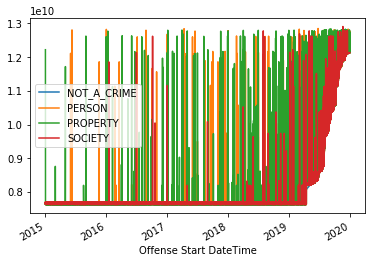

In [14]:
crime1519.groupby('Crime Against Category')['Offense ID'].plot(legend=True)

In [28]:
GR  = crime1519.groupby('Crime Against Category')['Report Number']

NOT_A_CRIME
PERSON
PROPERTY
SOCIETY


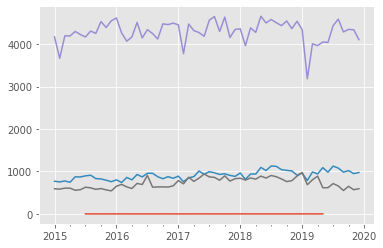

In [82]:
for gr in GR:
    print(gr[0])
    gr[1].resample('M').count().plot()

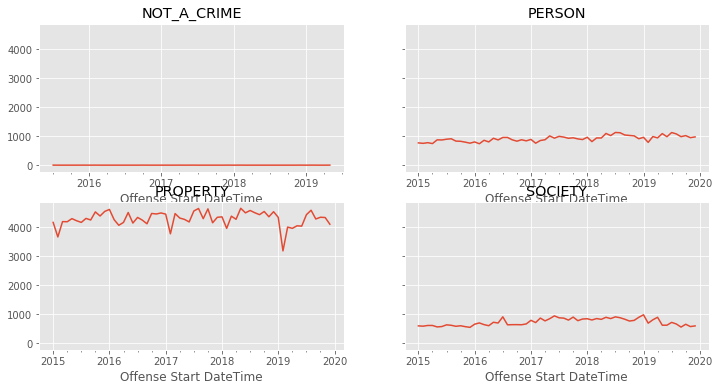

In [39]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6), sharey=True)

for (gr, ax) in zip(GR, axes.flatten()):
    gr[1].resample('M').count().plot(ax = ax)
    ax.set_title(gr[0])

#ax.legend()
plt.show()

Lets do many-many pics with Neighborhoods

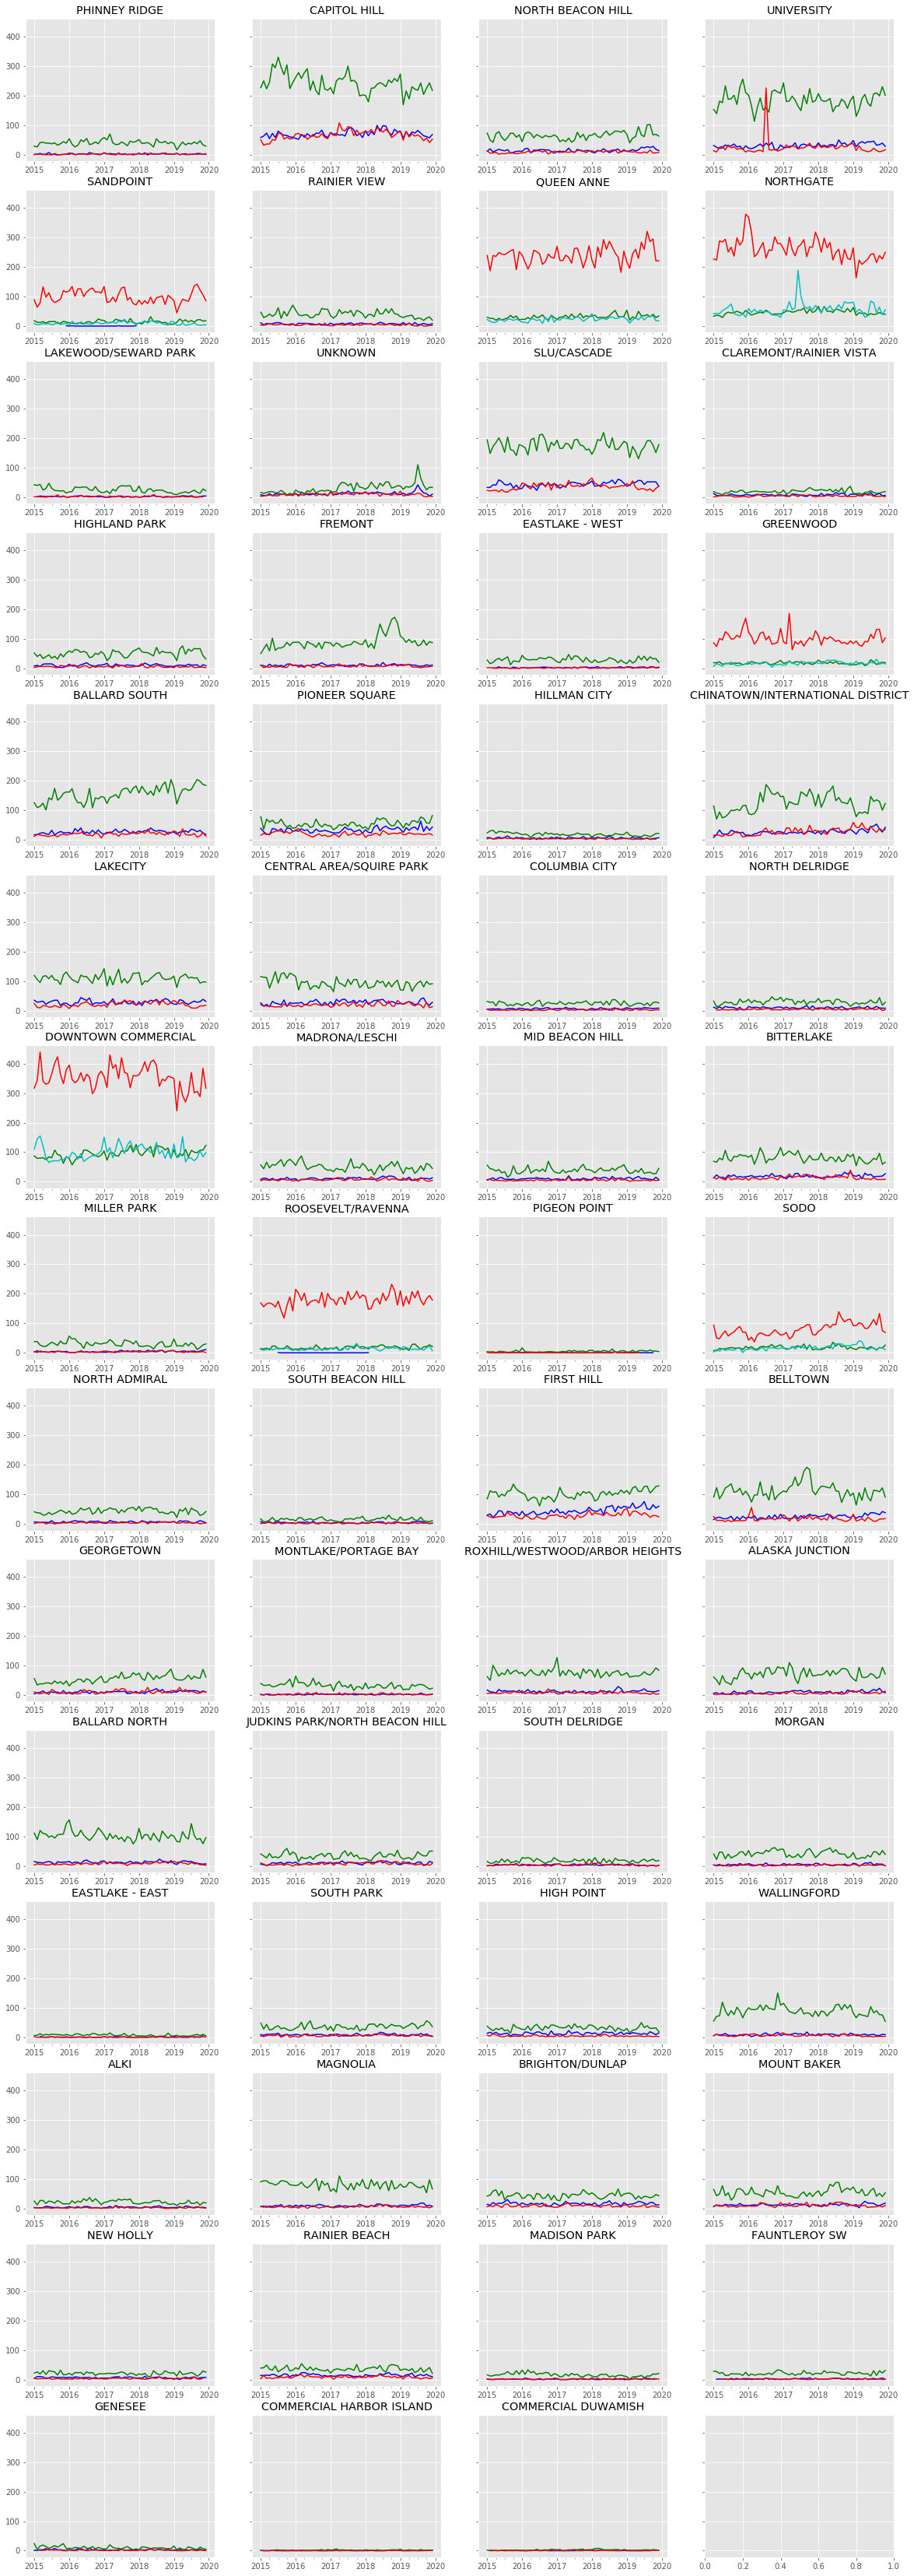

In [80]:
### 59 unique neighborhoods. (4 * 15)

ncols=4
nrows = 15

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,60), sharey=True)

for (nei, ax) in zip(neigh, axes.flatten()):
    df = crime1519[crime1519.MCPP==nei]
    grouped = df.groupby('Crime Against Category')['Beat']
    ax.set_xlabel('')
    ax.set_title(nei)
    for gr, c  in zip(grouped,['b','g','r','c']):
        gr[1].resample('M').count().plot(ax = ax, color = c)
    
    
plt.show()

In [77]:
crime1519.index.name= ''

In [78]:
crime1519.index.name

''

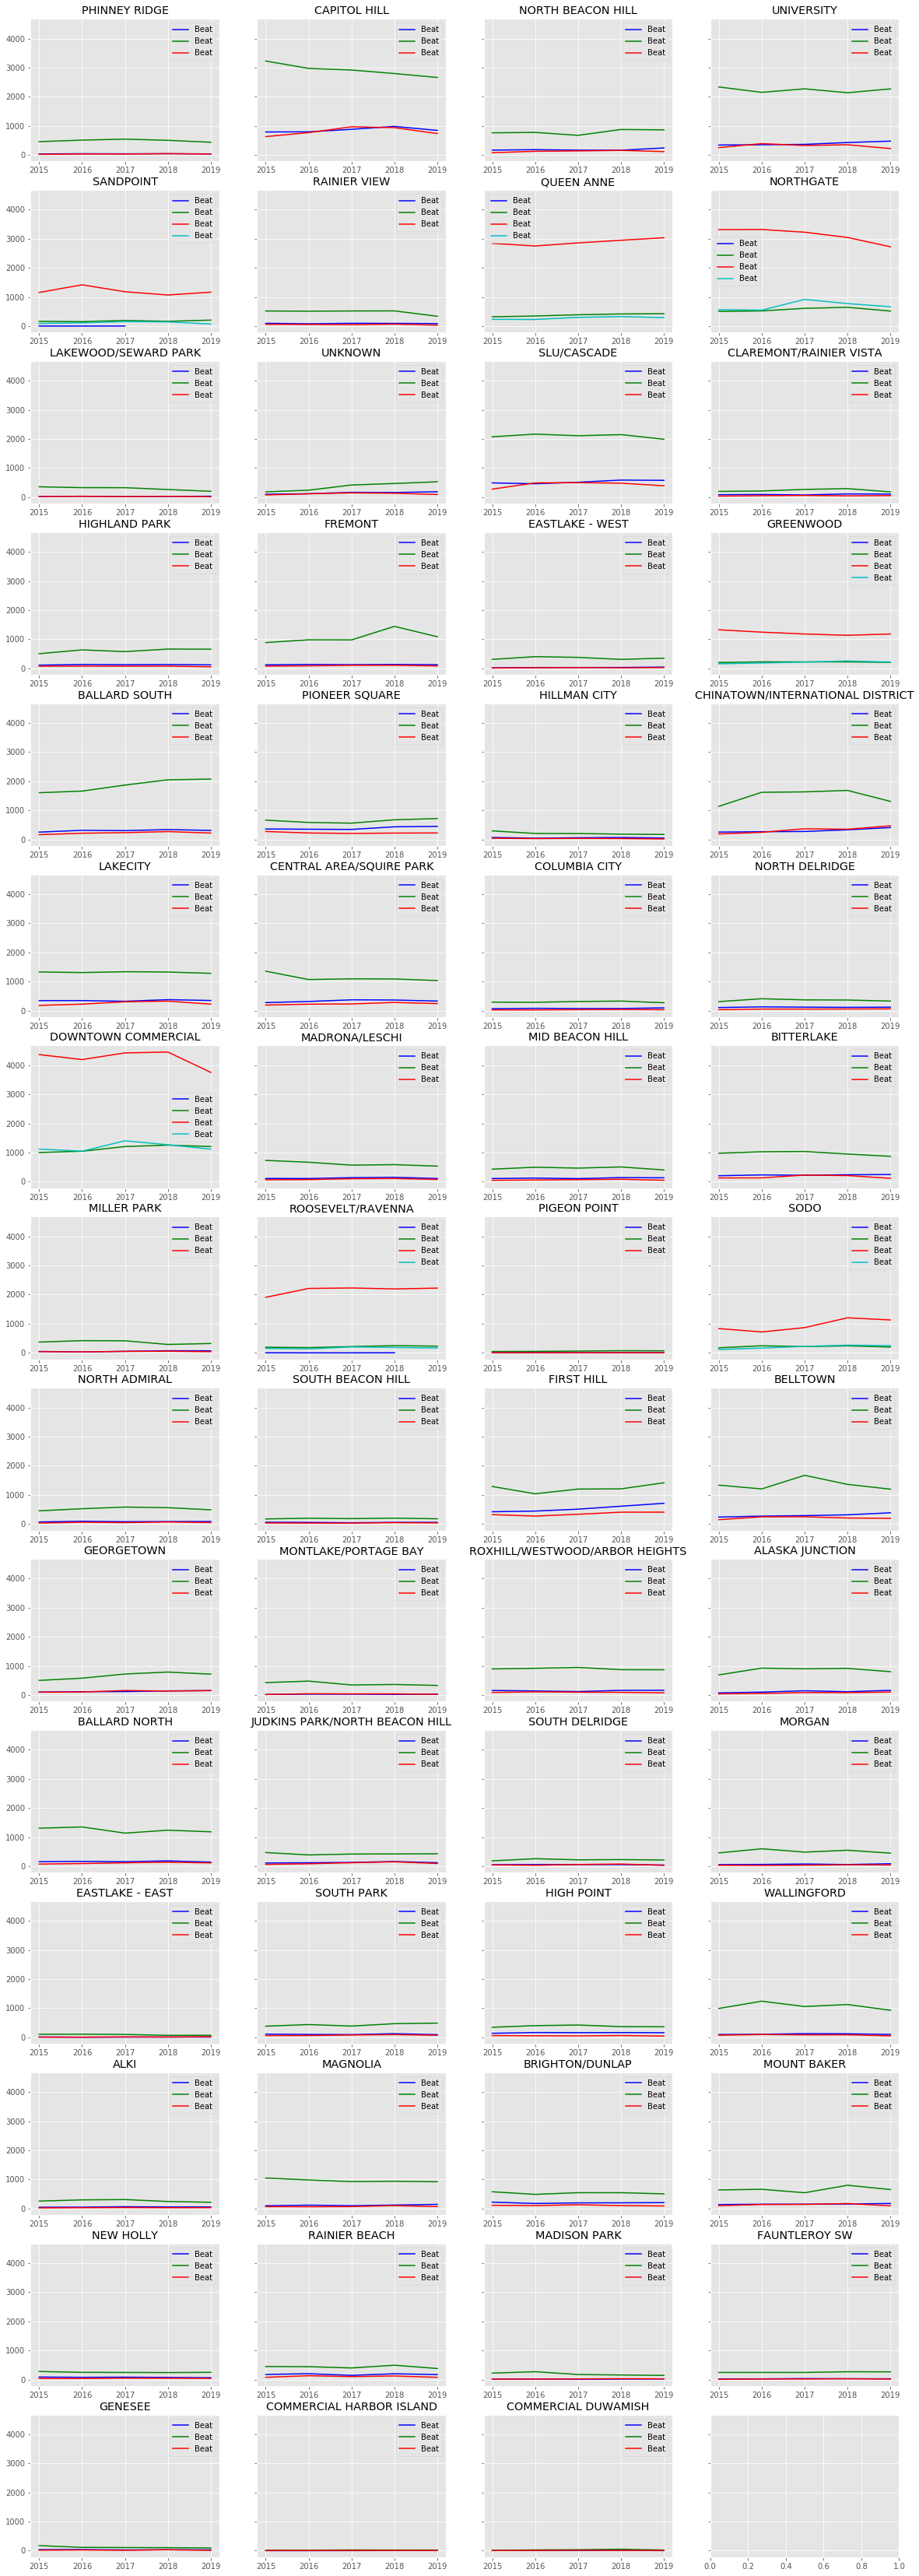

In [81]:
# same for Years 
ncols=4
nrows = 15

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,60), sharey=True)

for (nei, ax) in zip(neigh, axes.flatten()):
    df = crime1519[crime1519.MCPP==nei]
    grouped = df.groupby('Crime Against Category')['Beat']
    ax.set_xlabel('')
    ax.set_title(nei)
    for gr, c  in zip(grouped,['b','g','r','c']):
        gr[1].resample('A').count().plot(ax = ax, color = c)
    
    
plt.show()
"""
NOT_A_CRIME
PERSON
PROPERTY
SOCIETY
"""